# Brownian Bridge

In [1]:
import numpy as  np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(100)

A Brownian Bridge (BB) is a process associated to the Brownian Motion (BM), which starts in $x$ at instant $t_0$ going to the point $y$ at instant $T$, being $T > t_0$. Thus, the BB is defined as:

$$X_t = x + W_{t-t_0} - \frac{t-t_0}{T-t_0}\left( W_{T-t_0}-y+x\right)$$

In [3]:
def build_brownian_bridge(nb_simulations, nb_steps, t_0, T, x, y):
    dt = (T-t_0) / nb_steps
    X = np.zeros((nb_simulations,nb_steps+1))
    X[:,0] = x # Setting the first value of X to the initial value x

    W = np.sqrt(dt) * np.random.standard_normal((nb_simulations,nb_steps))
    W = W.cumsum(axis=1)
    steps_i = np.linspace(start=t_0, stop=T, num=nb_steps)
    slope_ = np.tile(((steps_i - t_0) / (T - t_0)),(nb_simulations,1))
    x_t = (x + W) - (slope_ * np.tile((W[:,-1] - y + x).reshape(-1,1),(1,nb_steps)))
    return x_t, steps_i

# Some examples

In [4]:
t_0 = 5
T = 10
x = 10
y = 4
steps = 2000
simulations = 100

In [5]:
x_t, steps_i = build_brownian_bridge(nb_simulations=simulations, nb_steps=steps, t_0=t_0, T=T, x=x, y=y)
desvest_path = np.std(x_t, axis=0)
mean_path = np.mean(x_t, axis=0)
D_sup_path = mean_path + desvest_path
D_inf_path = mean_path - desvest_path

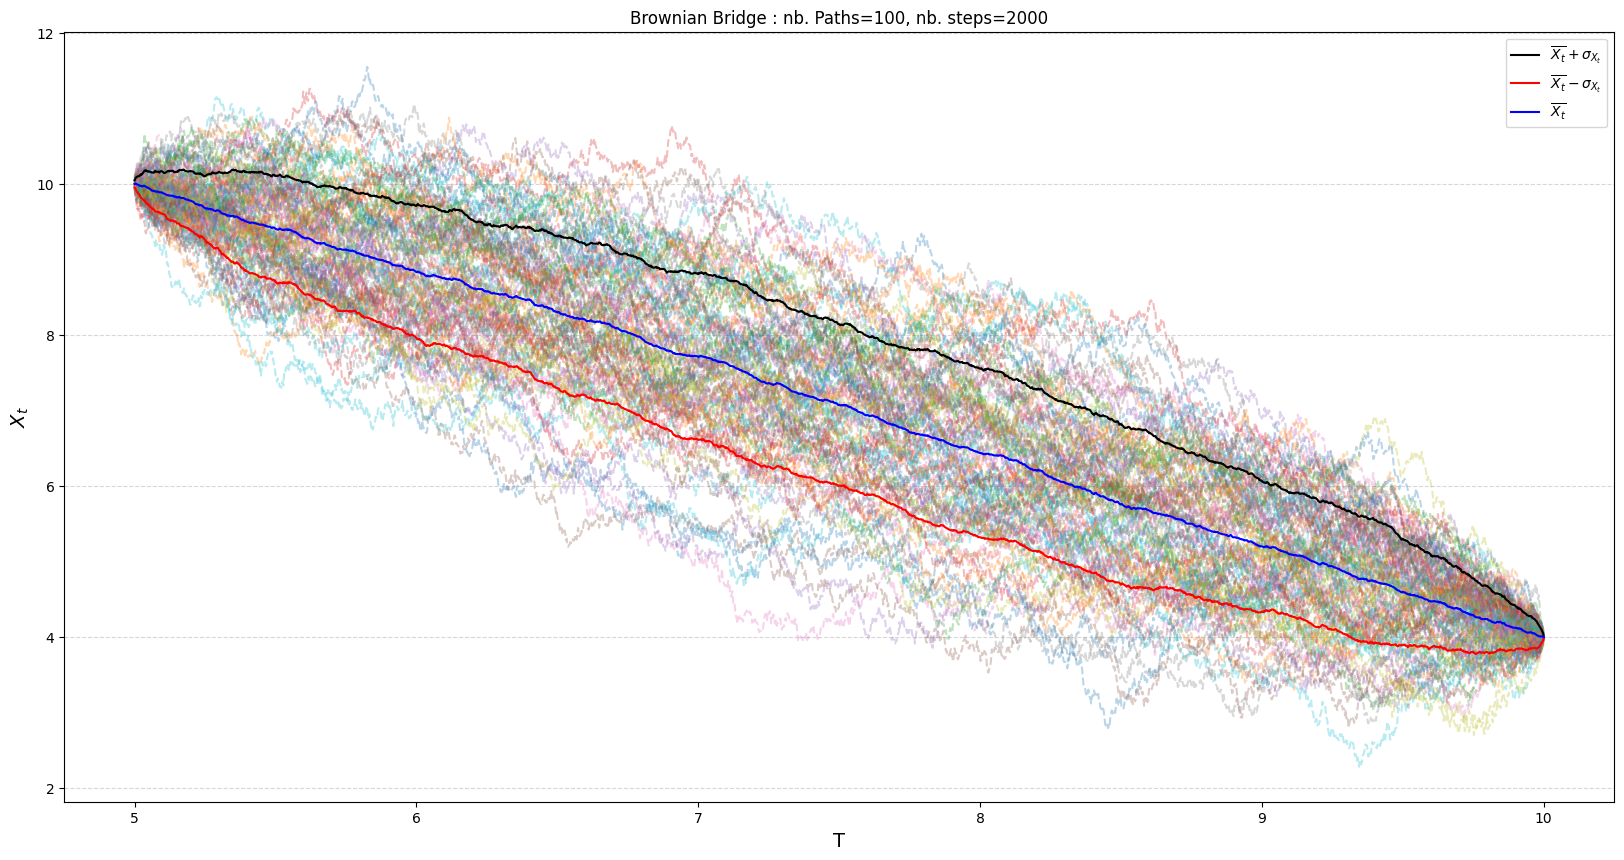

In [6]:
plt.figure(figsize=(20,10))
plt.plot(steps_i, x_t.T, linestyle='dashed', alpha=0.3)
plt.plot(steps_i, D_sup_path, color='black', label='$\overline{X_t} + \sigma_{X_t}$')
plt.plot(steps_i, D_inf_path, color='red', label='$\overline{X_t} - \sigma_{X_t}$')
plt.plot(steps_i, mean_path, color='blue', label='$\overline{X_t}$')
plt.title(f'{t_0 = }, {T = }\n{x = }, {y = }')
plt.title('Brownian Bridge : nb. Paths='+str(simulations)+', nb. steps='+str(steps))
plt.xlabel('T', fontsize=14)
plt.ylabel('$X_t$', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Standard Brownian Bridge

With $t_o \le t \le T$. In case $t_0 = 0$, $T=1$, $x=0$, and $y=0$ is denominated standard Brownian Bridge.

$$X_t=X_t - tW_t$$

In [7]:
t_0 = 0
T = 1
x = 0
y = 0
steps = 2000
dt = T / steps
simulations = 100

In [8]:
x_t, steps_i = build_brownian_bridge(nb_simulations=simulations, nb_steps=steps, t_0=t_0, T=T, x=x, y=y)
desvest_path = np.std(x_t, axis=0)
mean_path = np.mean(x_t, axis=0)
D_sup_path = mean_path + desvest_path
D_inf_path = mean_path - desvest_path

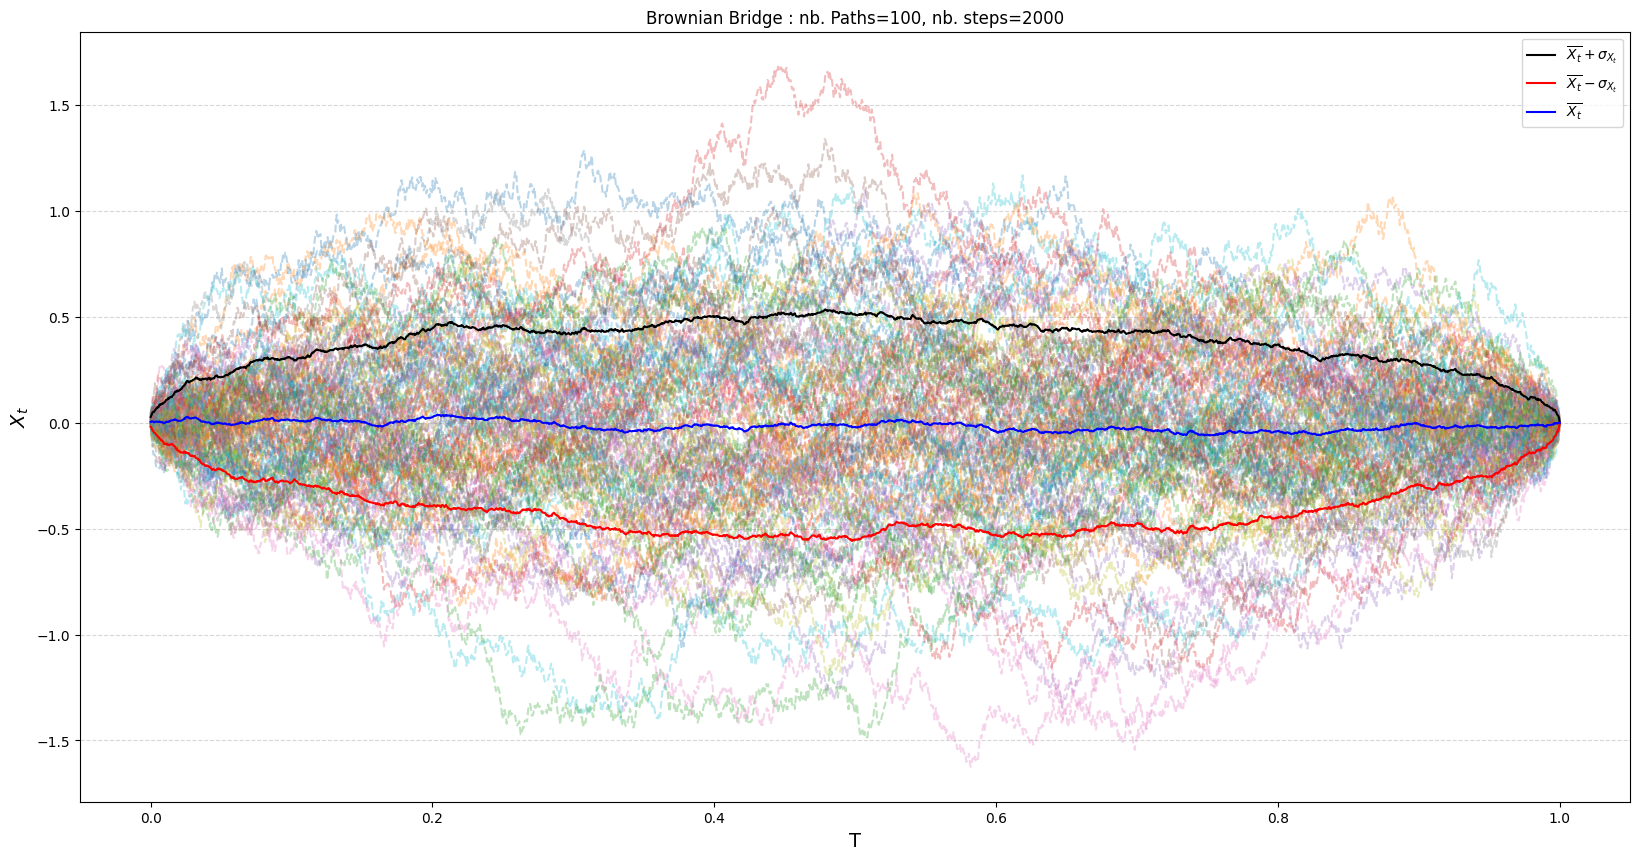

In [9]:
plt.figure(figsize=(20,10))
plt.plot(steps_i, x_t.T, linestyle='dashed', alpha=0.3)
plt.plot(steps_i, D_sup_path, color='black', label='$\overline{X_t} + \sigma_{X_t}$')
plt.plot(steps_i, D_inf_path, color='red', label='$\overline{X_t} - \sigma_{X_t}$')
plt.plot(steps_i, mean_path, color='blue', label='$\overline{X_t}$')
plt.title(f'{t_0 = }, {T = }\n{x = }, {y = }')
plt.title('Brownian Bridge : nb. Paths='+str(simulations)+', nb. steps='+str(steps))
plt.xlabel('T', fontsize=14)
plt.ylabel('$X_t$', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

<hr/>

This could not to be the final version, so if you have some recommendation or comment about this, I will be grateful to hear it, using e-mail <b>craquinterogo@unal.edu.co</b> or <b>cristian.quintero@est.uexternado.edu.co</b>